In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plane_fitting as plane

def point_cloud(center, depth,  Fx, Fy, k = 20, sitl = True):
    if sitl:
        center_depth = np.array(center, dtype=int)
    else:
        center_depth = np.array(center*360/480, dtype = int)
        center_depth = center_depth[0]
    data = depth[center_depth[1]-k:center_depth[1]+k +1,center_depth[0]-k:center_depth[0]+k+1]
    A = np.arange((2*k)+1)
    A = A-k
    x = []
    for i in range ((2*k)+1):
        x.append(A)
    x = np.array(x)*(-1)
    y = (x.T)
    x = x + center[0]
    y = y + center[1]
    x = x/Fx
    y = y/Fy
    x = x*data
    y = y*data
    avg_z = np.sum(data)/(data.shape[0]*data.shape[1])
    points = []
    points_sense = []
    points.append(x)
    points.append(y)
    points.append(data)
    points = np.array(points)
    points_sense.append(x)
    points_sense.append(data)
    points_sense = np.array(points_sense)
    points_sense = np.array(points_sense[:,8:12,:])
    points_sense = np.reshape(points_sense, (2, points_sense.shape[1]*points_sense.shape[2]))
    
    pc = np.reshape(points, (3,((2*k)+1)**2))
    pc = pc.T
    return pc, points_sense.T, avg_z


def plot_plane(a,b,c,d):
    pass

80.0
56.0


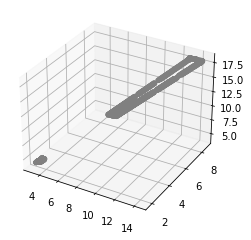

In [41]:
i = 0
depth = np.load('pc/depth_' + str(i) + '.npy')
b_box = np.load('pc/bounding_box_' + str(i) +'.npy')
center = np.array((b_box[0] + b_box[1])/2, dtype= int)
c_patch = np.array([(b_box[0,0] + b_box[1,0])/2 , (b_box[0,1]*3 + b_box[1,1])/4], dtype=int)
z_patch = depth[c_patch[1], c_patch[0]]
Px, Py = b_box[2, 0], b_box[2,1]
pc, points_sense, avg_z= point_cloud(center, depth, Px, Py, k = 40)
pc_patch, points, avg_z = point_cloud(c_patch, depth, Px, Py, k = 5)
print(b_box[1,1] - b_box[0,1])
print(b_box[1,0] - b_box[0,0])
m = plane.face_vector(pc)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(pc.T[0], pc.T[1], pc.T[2], color = 'gray')
ax.scatter((c_patch[0]/Px)*z_patch, (c_patch[1]/Py)*z_patch, z_patch, color = 'red')
ax.scatter(pc_patch.T[0], pc_patch.T[1], pc_patch.T[2], color= 'red')

plt.show()
plt.close('all')

In [42]:
pc.shape

(6561, 3)

In [51]:
points_sense.shape

(324, 2)

In [52]:
ix = np.argwhere(points_sense[:,1] > 6)

In [53]:
ix.shape

(68, 1)

In [45]:
pc = np.delete(pc, ix, axis = 0)

In [54]:
points_sense = np.delete(points_sense, ix, axis = 0)

In [55]:
points_sense

array([[3.62026955, 4.59624624],
       [3.6119498 , 4.59083605],
       [3.60483242, 4.58694363],
       [3.59772678, 4.5830574 ],
       [3.59063325, 4.57917786],
       [3.5835518 , 4.57530499],
       [3.57648243, 4.57143879],
       [3.56942474, 4.56757879],
       [3.56237908, 4.56372547],
       [3.55534544, 4.55987883],
       [3.54832343, 4.55603838],
       [3.5413134 , 4.55220461],
       [3.53431496, 4.54837704],
       [3.52732848, 4.54455614],
       [3.52035356, 4.54074144],
       [3.51370368, 4.53733778],
       [3.50784103, 4.53494406],
       [3.50089835, 4.531147  ],
       [3.49396754, 4.52735662],
       [3.4870482 , 4.52357244],
       [3.48014033, 4.51979446],
       [3.47324391, 4.51602268],
       [3.46635929, 4.51225758],
       [3.45948608, 4.50849867],
       [3.45262426, 4.50474596],
       [3.44577383, 4.50099945],
       [3.43893476, 4.49725914],
       [3.43210704, 4.49352503],
       [3.42529064, 4.48979712],
       [3.41848557, 4.4860754 ],
       [3.

In [46]:
pc.shape

(4940, 3)

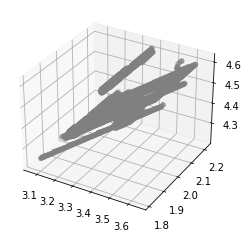

In [47]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(pc.T[0], pc.T[1], pc.T[2], color = 'gray')